# 3. Exploring one randomly selected game

---
**To be able to execute this notebook, please download your own local version of the data from https://www.kaggle.com/martinellis/nhl-game-data and store it into the folder "data/nhl/nhl_stats/"**


---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import Image

sns.set()

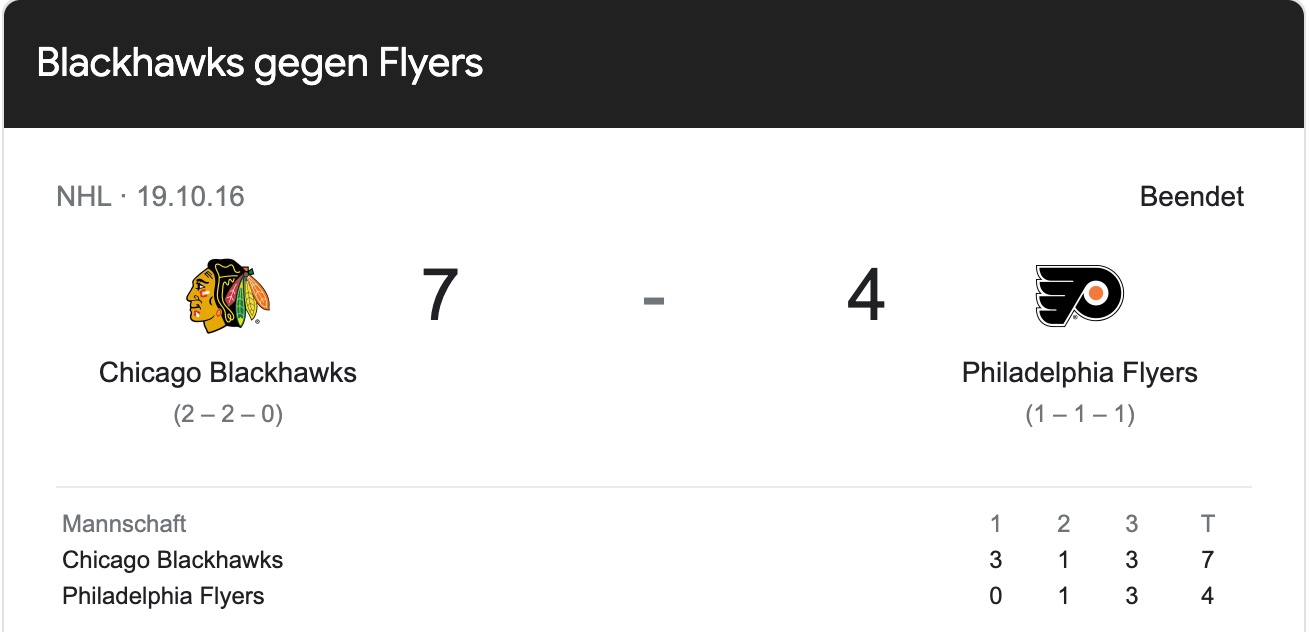

In [2]:
#exloring game
Image(filename='data/images/game_2016020045.jpg', width=600)

### Read game plays of the game

Read csv file and filter for the game #2016020045.

In [3]:
df = pd.read_csv('data/nhl/nhl_stats/game_plays.csv')
df = df[df.game_id==2016020045]
df.head()

,play_id,game_id,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y
0,2016020045_1,2016020045,NaN,NaN,Game Scheduled,NaN,NaN,NaN,1,REGULAR,0,1200.0,2016-10-18 23:40:58,0,0,Game Scheduled,NaN,NaN
1,2016020045_2,2016020045,NaN,NaN,Period Ready,NaN,NaN,NaN,1,REGULAR,0,1200.0,2016-10-19 01:35:28,0,0,Period Ready,NaN,NaN
2,2016020045_3,2016020045,NaN,NaN,Period Start,NaN,NaN,NaN,1,REGULAR,0,1200.0,2016-10-19 01:40:50,0,0,Period Start,NaN,NaN
3,2016020045_4,2016020045,16.0,4.0,Faceoff,NaN,0.0,0.0,1,REGULAR,0,1200.0,2016-10-19 01:40:50,0,0,Jonathan Toews faceoff won against Claude Giroux,0.0,0.0
4,2016020045_5,2016020045,16.0,4.0,Shot,Wrist Shot,-71.0,9.0,1,REGULAR,54,1146.0,2016-10-19 01:41:44,0,0,Artem Anisimov Wrist Shot saved by Michal Neuv...,71.0,-9.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   play_id              299 non-null    object 
 1   game_id              299 non-null    int64  
 2   team_id_for          246 non-null    float64
 3   team_id_against      246 non-null    float64
 4   event                299 non-null    object 
 5   secondaryType        62 non-null     object 
 6   x                    246 non-null    float64
 7   y                    246 non-null    float64
 8   period               299 non-null    int64  
 9   periodType           299 non-null    object 
 10  periodTime           299 non-null    int64  
 11  periodTimeRemaining  299 non-null    float64
 12  dateTime             299 non-null    object 
 13  goals_away           299 non-null    int64  
 14  goals_home           299 non-null    int64  
 15  description          299 non-null    obj

In [5]:
df.event.value_counts()

Faceoff            57
Hit                50
Shot               44
Stoppage           39
Giveaway           28
Blocked Shot       20
Takeaway           17
Missed Shot        12
Goal               11
Penalty             7
Period Ready        3
Period End          3
Period Start        3
Period Official     3
Game Scheduled      1
Game End            1
Name: event, dtype: int64

---
Focusing to events *Goal*

In [6]:
df_goals = df[(df.event=='Goal')]
df_goals.head()

,play_id,game_id,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y
5,2016020045_6,2016020045,16.0,4.0,Goal,Wrap-around,-88.0,5.0,1,REGULAR,56,1144.0,2016-10-19 01:41:48,0,1,"Patrick Kane (1) Wrap-around, assists: Artem A...",88.0,-5.0
96,2016020045_97,2016020045,16.0,4.0,Goal,Backhand,-76.0,1.0,1,REGULAR,1046,154.0,2016-10-19 02:12:13,0,2,"Dennis Rasmussen (1) Backhand, assists: none",76.0,-1.0
102,2016020045_103,2016020045,16.0,4.0,Goal,Slap Shot,-67.0,-28.0,1,REGULAR,1092,108.0,2016-10-19 02:14:30,0,3,"Artemi Panarin (1) Slap Shot, assists: Brent S...",67.0,28.0
139,2016020045_140,2016020045,16.0,4.0,Goal,Backhand,83.0,-11.0,2,REGULAR,304,896.0,2016-10-19 02:44:03,0,4,"Marian Hossa (1) Backhand, assists: Artem Anis...",83.0,-11.0
196,2016020045_197,2016020045,4.0,16.0,Goal,Wrist Shot,-76.0,-11.0,2,REGULAR,1103,97.0,2016-10-19 03:09:40,1,4,"Matt Read (2) Wrist Shot, assists: Jakub Vorac...",76.0,11.0


All columns are obvious. I we want to make a goal probabity based on the location, we need to investigate the difference between **x/y** and **st_x/st_y**.

Plotting the difference on a hockey field.

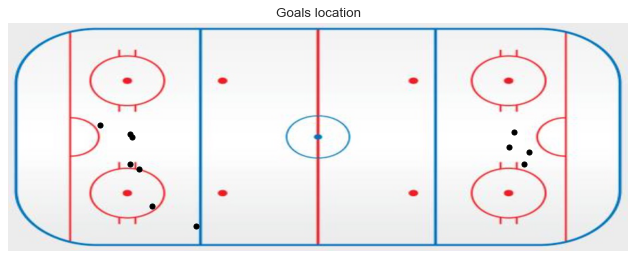

In [7]:
plt.figure(figsize=(10, 6), dpi=80)
img=plt.imread('data/images/rink.jpg')
plt.grid()
plt.axis("off")
plt.imshow(img, extent=[-125, 125, -46, 46])
plt.scatter(df_goals.x, df_goals.y, s=20, c='black');
plt.title('Goals location');

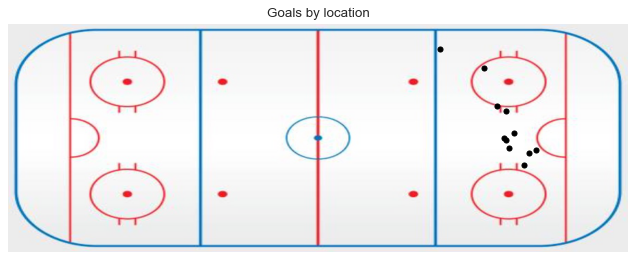

In [8]:
plt.figure(figsize=(10, 6), dpi=80)
img=plt.imread('data/images/rink.jpg')
plt.grid()
plt.axis("off")
plt.imshow(img, extent=[-125, 125, -46, 46])
plt.scatter(df_goals.st_x, df_goals.st_y, s=20, c='black');
plt.title('Goals by location');

The values **st_x/st_y** mirror all events to the same half of the rink. This might be usefull for modelling as it normalizes events on one goal only.
___

### Investigating all shots and goals in the game

In [9]:
df_shots = df[(df.event=='Shot') & (df.game_id==2016020045)]
df_shots.head()

,play_id,game_id,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y
4,2016020045_5,2016020045,16.0,4.0,Shot,Wrist Shot,-71.0,9.0,1,REGULAR,54,1146.0,2016-10-19 01:41:44,0,0,Artem Anisimov Wrist Shot saved by Michal Neuv...,71.0,-9.0
7,2016020045_8,2016020045,4.0,16.0,Shot,Wrist Shot,56.0,-7.0,1,REGULAR,69,1131.0,2016-10-19 01:42:41,0,1,Dale Weise Wrist Shot saved by Corey Crawford,56.0,-7.0
11,2016020045_12,2016020045,16.0,4.0,Shot,Slap Shot,-37.0,-24.0,1,REGULAR,133,1067.0,2016-10-19 01:43:45,0,1,Duncan Keith Slap Shot saved by Michal Neuvirth,37.0,24.0
16,2016020045_17,2016020045,4.0,16.0,Shot,Wrist Shot,57.0,-20.0,1,REGULAR,168,1032.0,2016-10-19 01:44:54,0,1,Wayne Simmonds Wrist Shot saved by Corey Crawford,57.0,-20.0
18,2016020045_19,2016020045,4.0,16.0,Shot,Slap Shot,34.0,14.0,1,REGULAR,171,1029.0,2016-10-19 01:45:01,0,1,Shayne Gostisbehere Slap Shot saved by Corey C...,34.0,14.0


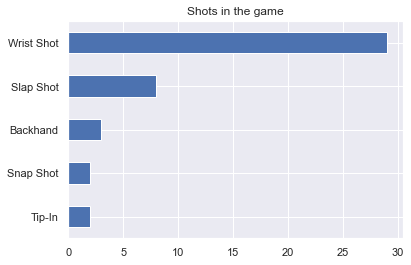

In [10]:
df_shots.secondaryType.value_counts().sort_values(0, ascending=False)[:10].sort_values(0, ascending=True).plot(kind='barh', title='Shots in the game');

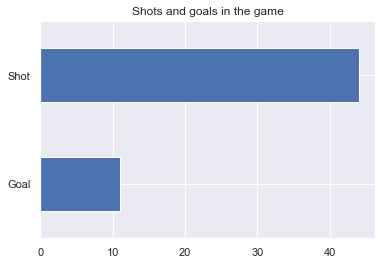

In [11]:
df_shots = df[(df.event=='Shot') | (df.event=='Goal')]
df_shots.event.value_counts().sort_values(0, ascending=False)[:10].sort_values(0, ascending=True).plot(kind='barh', title='Shots and goals in the game');

In [12]:
print(f'There were {df_shots.shape[0]} overall shots the the game. {df_shots[df_shots.event=="Goal"].shape[0]} of them have lead to a goal.')

There were 55 overall shots the the game. 11 of them have lead to a goal.


---

And now, what were the shot types leading to a goal:

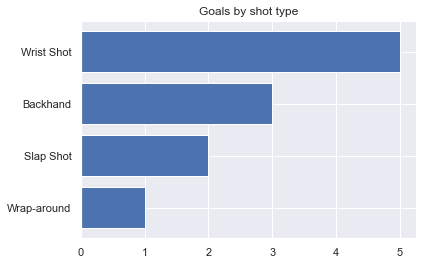

In [13]:
df_goal_counts = df_goals.secondaryType.value_counts().reset_index().rename(columns={'secondaryType':'cnt', 'index':'type'}).sort_values('cnt')

plt.barh(df_goal_counts.type, df_goal_counts.cnt);
plt.title('Goals by shot type');

---
**Position of a shot and the type of the shot might provide a good signal in the predicion of a goal. This will be modelled in the next part of the project**

---